In [3]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

In [4]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

In [6]:
rin = pd.read_csv("../../data/1550/rin/rin.csv")
rin.head()

,freq,psd_x,psd_y,psd_z
0,0.000000,0.000017,0.000009,7.422831e-07
1,19.998667,0.000137,0.000065,5.443595e-06
2,39.997333,0.000041,0.000031,2.058017e-06
3,59.996000,0.000016,0.000015,5.251847e-07
4,79.994667,0.000008,0.000007,2.470422e-07


In [24]:
noise_line_x = rin["psd_x"].values[-1000:]
noise_line_y = rin["psd_y"].values[-1000:]
noise_line_z = rin["psd_z"].values[-1000:]
noise_line_x = np.ones(len(rin))*noise_line_x.mean() 
noise_line_y = np.ones(len(rin))*noise_line_y.mean()
noise_line_z = np.ones(len(rin))*noise_line_z.mean()

In [26]:
noise_line_x

array([1.13498307e-09, 1.13498307e-09, 1.13498307e-09, ...,
       1.13498307e-09, 1.13498307e-09, 1.13498307e-09])

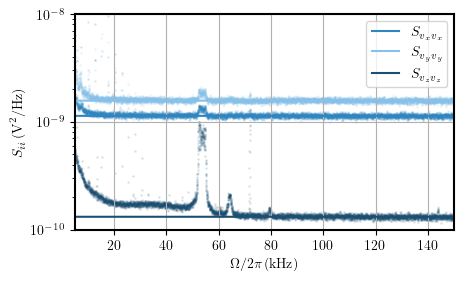

In [36]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig = plt.figure(figsize=(5.4*1.3*10, 10*4.2))
factor = 0.7
fig.set_size_inches(7*factor, 4*factor, forward=True)
colors = ['#2E86C1', '#85C1E9', '#1B4F72']

plt.scatter(rin["freq"]/1e3, rin["psd_x"], color=colors[0], s=1, alpha=0.1)
plt.plot(rin["freq"].values/1e3, noise_line_x, color=colors[0])
#plt.plot(omegas/(2*np.pi*1e3), np.sqrt(2*np.pi)*fit_x, color=colors[0])
plt.scatter(rin["freq"]/1e3, rin["psd_y"], color=colors[1], s=1, alpha=0.1)
plt.plot(rin["freq"].values/1e3, noise_line_y, color=colors[1])

plt.scatter(rin["freq"]/1e3, rin["psd_z"], color=colors[2], s=1, alpha=0.1)
plt.plot(rin["freq"].values/1e3, noise_line_z, color=colors[2])

#plt.scatter(freq/1e3, p_yy, color=colors[1], s=1, alpha=0.3)
#plt.plot(omegas/(2*np.pi*1e3), np.sqrt(2*np.pi)*fit_y, color=colors[1])
#plt.scatter(freq/1e3, p_zz, color=colors[2], s=1, alpha=0.3)
#plt.plot(omegas/(2*np.pi*1e3), np.sqrt(2*np.pi)*fit_z, color=colors[2])
plt.yscale('log')
plt.xlabel(r'$\Omega/2\pi \,(\textrm{kHz})$')
plt.ylabel(r'$S_{ii} \,(\textrm{V}^2/\textrm{Hz})$')
plt.xlim([5, 150])
plt.ylim([10e-11, 10e-9])
#plt.ylim([1e-22, 2e-15])
#plt.xticks([25, 50, 75])
plt.legend([r'$S_{v_xv_x}$', r'$S_{v_yv_y}$', r'$S_{v_zv_z}$'])
plt.grid()
plt.savefig('../../plots/Chapter 5/rin.pdf', dpi=300, bbox_inches = 'tight')
